#**IMPORTING REQUIRED LIBRARIES**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format',lambda x:'%.3f' % x)

In [55]:
data=pd.read_csv("creditcard.csv")

In [56]:
data.shape

(284807, 31)

#**DATA ANALYSIS AND VISUALIZATION**

In [57]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [188]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221880 entries, 0 to 221879
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    221880 non-null  float64
 1   V1      221880 non-null  float64
 2   V2      221880 non-null  float64
 3   V3      221880 non-null  float64
 4   V4      221880 non-null  float64
 5   V5      221880 non-null  float64
 6   V6      221880 non-null  float64
 7   V7      221880 non-null  float64
 8   V8      221880 non-null  float64
 9   V9      221880 non-null  float64
 10  V10     221880 non-null  float64
 11  V11     221880 non-null  float64
 12  V12     221880 non-null  float64
 13  V13     221880 non-null  float64
 14  V14     221880 non-null  float64
 15  V15     221880 non-null  float64
 16  V16     221880 non-null  float64
 17  V17     221880 non-null  float64
 18  V18     221880 non-null  float64
 19  V19     221880 non-null  float64
 20  V20     221880 non-null  float64
 21  V21     22

In [60]:
data.isnull().values.any()

False

In [138]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [61]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,1.089,1.021,0.999,0.995,0.959,0.915,0.876,0.849,0.838,0.814,0.771,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,-0.762,-0.406,-0.649,-0.426,-0.583,-0.468,-0.484,-0.499,-0.456,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,-0.033,0.140,-0.014,0.051,0.048,0.066,-0.066,-0.004,0.004,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,0.740,0.618,0.663,0.493,0.649,0.523,0.400,0.501,0.459,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [62]:
x=data.iloc[:,1:30].values
y=data.iloc[:,-1].values

In [64]:
print(x.shape)
print(y.shape)

(284807, 29)
(284807,)


Text(0, 0.5, 'no of records')

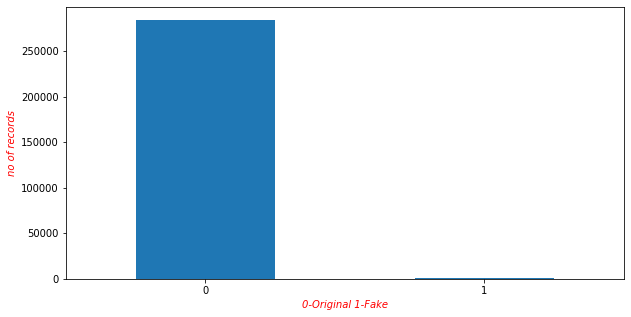

In [71]:
plt.rcParams['figure.figsize']=(10,5)
data_c=pd.value_counts(data['Class'],sort=True)
data_c.plot(kind='bar',rot=1)
plt.xlabel("0-Original 1-Fake",color='Red',fontstyle='italic')
plt.ylabel("no of records",color='Red',fontstyle='italic')

In [72]:
len(data[data['Class']==0])

284315

In [73]:
len(data[data['Class']==1])

492

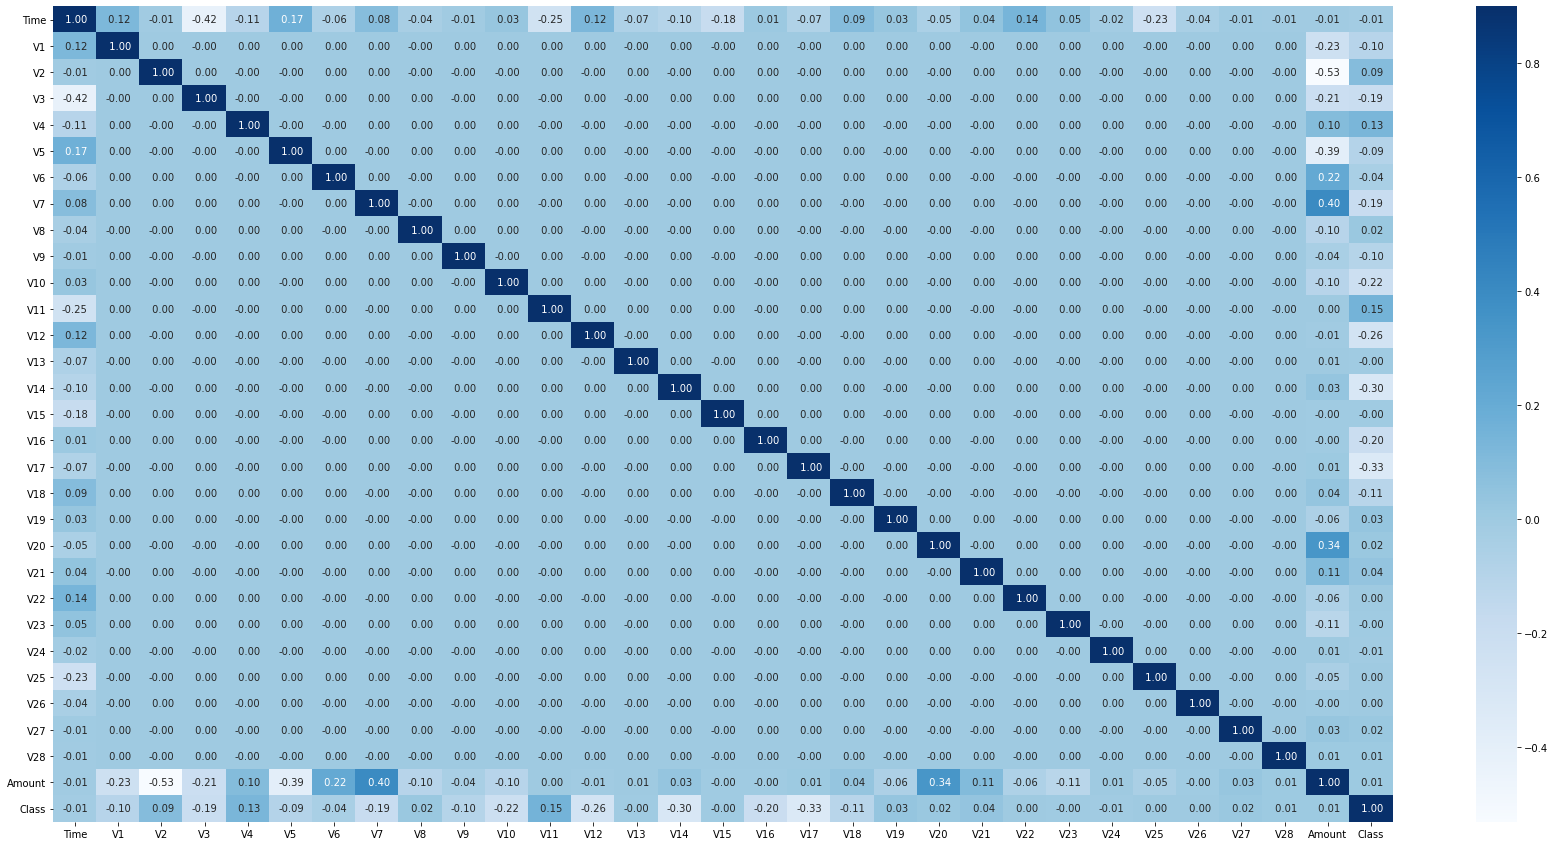

In [82]:
plt.rcParams['figure.figsize']=(30,15)
cor=data.corr()
sns.heatmap(cor,cmap='Blues',vmax=0.9,annot=True,fmt=' .2f')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [95]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=0)

In [96]:
trainx.shape

(227845, 29)

In [97]:
trainy.shape

(227845,)

#**DECISION TREE CLASSIFIER:**

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(trainx,trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [100]:
predict=classifier.predict(testx)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
from sklearn.metrics import accuracy_score


In [106]:
print(accuracy_score(testy,predict)*100,'%')

99.93153330290369 %


#**LOGISTIC REGRESSION**

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
model1=LogisticRegression()

In [116]:
import warnings
warnings.filterwarnings('ignore')
model1.fit(trainx,trainy)
predict1=model1.predict(testx)
print(accuracy_score(testy,predict1)*100,"%")

99.92451107756047 %


#**SIMPLE NEURAL NETWORK MODEL**

In [121]:
import tensorflow
from keras import layers,Sequential,models
from tensorflow.keras.metrics import AUC

In [129]:
model=Sequential([layers.Flatten(input_shape=(29,)),
layers.Dense(841,activation='relu'),
layers.Dropout(0.5),
layers.Dense(420,activation='relu'),
layers.Dense(1,activation='sigmoid'),]) 

In [131]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(trainx,trainy,epochs=50,batch_size=160)
test_loss,test_acc=model.evaluate(testx,testy)

Epoch 1/50
1425/1425 [==============================] - 36s 15ms/step - loss: 0.0648 - accuracy: 0.9955
Epoch 2/50
1425/1425 [==============================] - 21s 14ms/step - loss: 0.0108 - accuracy: 0.9992
Epoch 3/50
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0072 - accuracy: 0.9992
Epoch 4/50
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0096 - accuracy: 0.9991
Epoch 5/50
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0061 - accuracy: 0.9992
Epoch 6/50
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0066 - accuracy: 0.9992
Epoch 7/50
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0083 - accuracy: 0.9991
Epoch 8/50
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0072 - accuracy: 0.9993
Epoch 9/50
1425/1425 [==============================] - 21s 15ms/step - loss: 0.0072 - accuracy: 0.9993
Epoch 10/50
1425/1425 [==============================] - 21s 15m

In [137]:
print('Test accuracy:',test_acc*100,"%")

Test accuracy: 99.94733333587646 %


# **SAMPLE INPUTS**

In [158]:
def output(y):
  s=model1.predict(y)
  f=classifier.predict(y)
  if s==[0] and f==[0]:
    return "The Given Card is Not a Fradulant_(logisticRegression,DecisionTree)"
  else:
    return "The Given Card is Fradulant_(logisticRegression,DecisionTree)"
print("Enter values like-V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount")    
s=[[-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660]]
print(" ")
print(output(s))

Enter values like-V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
 
The Given Card is Not a Fradulant_(logisticRegression,DecisionTree)


In [187]:
s=[[-2.312 	,1.952 ,	-1.610 ,	3.998 	,-0.522 	,-1.427 ,	-2.537, 	1.392 ,	-2.770 ,	-2.772 ,	3.202 	,-2.900 	,-0.595 ,	-4.289 	,0.390 	,-1.141 	,-2.830 	,-0.017 	,0.417 	,0.127 	,0.517 	,-0.035 	,-0.465 	,0.320 	,0.045 ,	0.178 ,0.261 ,-0.143,0.000]]
print(output(s))

The Given Card is Fradulant_(logisticRegression,DecisionTree)
